In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
matches_data = pd.read_csv('Dataset/IPL_Matches_2008_2022.csv')
match_data = pd.read_csv('Dataset/IPL_Ball_by_Ball_2008_2022.csv')

In [70]:
matches_data.drop(columns = ['Season', 'MatchNumber','City','TossWinner','TossDecision','Team1','WinningTeam','WonBy','Margin','method','Player_of_Match','Team1Players','Team2Players','Umpire1','Umpire2'],inplace=True)

In [71]:
match_data.drop(columns =['non_boundary','extra_type','player_out','kind','fielders_involved'] ,inplace = True)

In [72]:
agg_data = match_data.merge(matches_data,how='inner',on='ID')
agg_data['Date'] = agg_data['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
agg_data = agg_data[agg_data['Date'].dt.year <= 2021]
agg_data = agg_data.reset_index(drop=True)

In [73]:
agg_data['Venue'] = agg_data['Venue'].str.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium')
agg_data['Venue'] = agg_data['Venue'].str.replace('Feroz Shah Kotla','Arun Jaitley Stadium')
agg_data['Venue'] = agg_data['Venue'].str.replace('Sardar Patel Stadium, Motera','Narendra Modi Stadium')
agg_data['Venue'] = agg_data['Venue'].str.replace('Subrata Roy Sahara Stadium','Maharashtra Cricket Association Stadium')
agg_data['Venue'] = agg_data['Venue'].str.replace('Sheikh Zayed Stadium','Zayed Cricket Stadium')
agg_data['Venue'] = agg_data['Venue'].str.replace('M Chinnaswamy Stadium','M.Chinnaswamy Stadium')
#removing duplicates from Venue


In [74]:
agg_data['Venue'] = agg_data.Venue.str.split(',',expand=True)[0]

In [75]:
agg_data.BattingTeam.unique()

array(['Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Rajasthan Royals', 'Punjab Kings', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [76]:
agg_data.BattingTeam = agg_data.BattingTeam.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants')
agg_data.BattingTeam = agg_data.BattingTeam.replace(to_replace='Delhi Daredevils', value='Delhi Capitals')
agg_data.BattingTeam = agg_data.BattingTeam.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad')
agg_data.BattingTeam = agg_data.BattingTeam.replace(to_replace='Kings XI Punjab', value='Punjab Kings')

In [77]:
agg_data.Team2 = agg_data.Team2.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants')
agg_data.Team2 = agg_data.Team2.replace(to_replace='Delhi Daredevils', value='Delhi Capitals')
agg_data.Team2 = agg_data.Team2.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad')
agg_data.Team2 = agg_data.Team2.replace(to_replace='Kings XI Punjab', value='Punjab Kings')

In [78]:
agg_data.BattingTeam.unique()

array(['Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Rajasthan Royals', 'Punjab Kings', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

Number of matches played by each Team 

BattingTeam
Mumbai Indians                 26135
Sunrisers Hyderabad            25607
Delhi Capitals                 24723
Kolkata Knight Riders          24558
Royal Challengers Bangalore    24547
Punjab Kings                   24322
Chennai Super Kings            23409
Rajasthan Royals               20670
Pune Warriors                   5443
Gujarat Lions                   3566
Rising Pune Supergiants         3480
Kochi Tuskers Kerala            1582
Name: count, dtype: int64


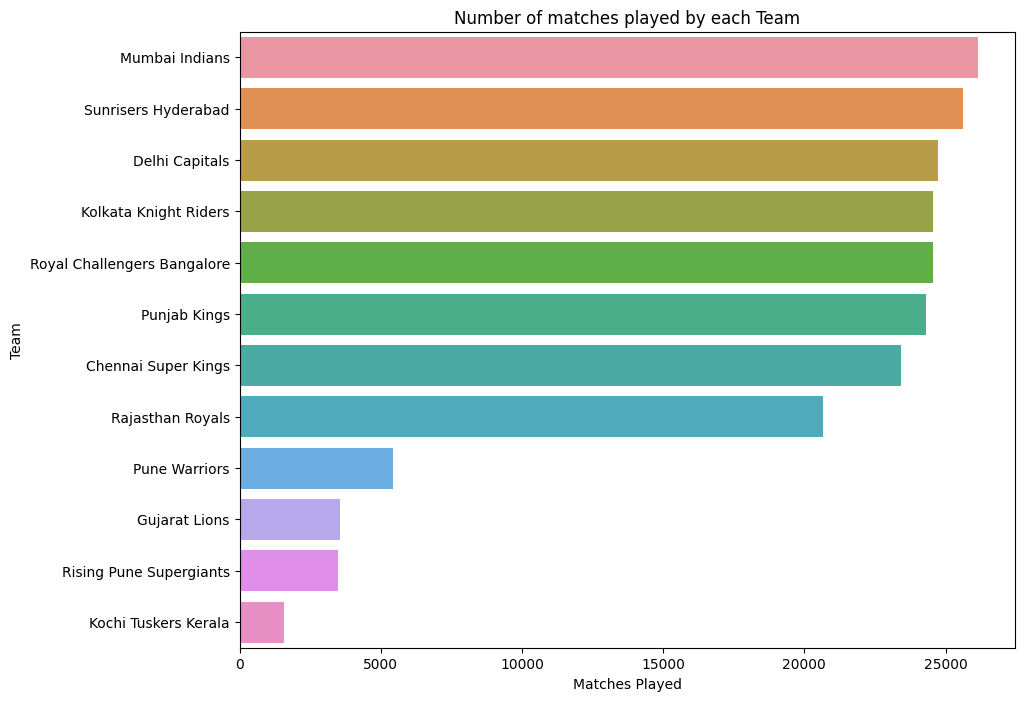

In [79]:
p = agg_data['BattingTeam'].value_counts()
print('Number of matches played by each Team \n')
print(p)

# Plotting
plt.figure(figsize=(10,8))
data = agg_data['BattingTeam'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.title('Number of matches played by each Team')
plt.show()


In [80]:
#keeping only important teams (new teams as well)
#removing gujarat titans and lucknow as their data is only avialable for 2022
consistent_teams = ['Rajasthan Royals',
       'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders']
agg_data = agg_data[(agg_data['BattingTeam'].isin(consistent_teams)) & (agg_data['Team2'].isin(consistent_teams))]

In [81]:

import plotly.graph_objects as go
normal = agg_data[agg_data['SuperOver'] == 'N']
tie = agg_data[agg_data['SuperOver'] == 'Y']
no_result = agg_data[agg_data['SuperOver'].isna()]

result = pd.DataFrame({'Result':['Normal','Tie','No Result'],'per':[normal.shape[0], tie.shape[0], no_result.shape[0]] })

labels = result['Result']
values = result['per']

fig = go.Figure(data=[go.Pie(labels=labels,title='Result of matches', values=values, pull=[0, 0.2, 0])])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [82]:
#removing super over data as it is very low in volume
normal_match_data = agg_data.loc[agg_data['innings']<3]

In [83]:
normal_match_data['total_wickets'] = normal_match_data.groupby(['ID','BattingTeam'])['isWicketDelivery'].cumsum()
normal_match_data['total_runs'] = normal_match_data.groupby(['ID','BattingTeam'])['total_run'].cumsum()
normal_match_data['total_extra_runs'] = normal_match_data.groupby(['ID','BattingTeam'])['extras_run'].cumsum()
normal_match_data['bt_run']=normal_match_data.groupby(['ID','BattingTeam','batter'])['batsman_run'].cumsum()

/tmp/ipykernel_7067/3037788040.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7067/3037788040.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7067/3037788040.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7067

In [84]:
normal_match_data['p1'] = normal_match_data['batter'].shift(1)
normal_match_data['p2'] = normal_match_data['non-striker'].shift(1)
normal_match_data.loc[0,['p1','p2']] = normal_match_data.loc[0,['batter','non-striker']].values
normal_match_data['wicket_s']=normal_match_data['total_wickets'].astype(str).shift(1)
normal_match_data['iswicket_s']=normal_match_data['isWicketDelivery'].astype(str).shift(1)
normal_match_data['iswicket_s'][0]='0'
normal_match_data.loc[(normal_match_data['ballnumber']==1)&(normal_match_data['overs']==0),'wicket_s']='0'
def players(batter,p1,p2,non_striker):
    #print(batter,p1,bt_run)
    p1_n = None
    p2_n = None
    if (batter != p1) and (batter != p2):
        p1_n = batter
        p2_n = non_striker
    elif (non_striker != p2) and (non_striker != p1):
        p1_n = non_striker
        p2_n = batter
        
    return np.array([p1_n,p2_n])
pl_list=np.vectorize(players,signature='(),(),(),()->(n)')(normal_match_data['batter'],normal_match_data['p1'],normal_match_data['p2'],normal_match_data['non-striker'])

normal_match_data[['p1','p2']]=pl_list
normal_match_data.loc[0,['p1','p2']] = normal_match_data.loc[0,['batter','non-striker']].values
#normal_match_data.loc[(normal_match_data['ballnumber']==1)&(normal_match_data['overs']==0),['p1','p2']]=normal_match_data.loc[(normal_match_data['ballnumber']==1)&(normal_match_data['overs']==0),['batter','non-striker']].values
normal_match_data[['p1','p2']] = normal_match_data.groupby(['ID','BattingTeam','wicket_s'])[['p1','p2']].transform(lambda x: x.ffill())


/tmp/ipykernel_7067/569464399.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7067/569464399.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7067/569464399.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7067/56

In [85]:
def bt_run(batter,p1,bt_run):
    #print(batter,p1,bt_run)
  
    if batter==p1:
        bt1_run = bt_run
        bt2_run = None
    else:
        bt2_run = bt_run
        bt1_run = None
    return np.array([bt1_run,bt2_run])
  
args={}
# normal_match_data['bt1_run']=0
# normal_match_data['bt2_run']=0
# normal_match_data['prev_batter'] = normal_match_data.batter.shift(1)
# normal_match_data.loc[0,'prev_batter'] = normal_match_data.loc[0,'batter']
# # args['batter'] = normal_match_data['batter'][0]
# args['non_striker'] = normal_match_data['non-striker'][0]
# for ind,row in normal_match_data[['ID','BattingTeam','batter','non-striker']].drop_duplicates().iloc[0::2].iterrows():
#     #print(row)
#     if row['isWicketDelivery'] == 1:
#         args['batter'] = row['batter']
#         args['non_striker'] = row['non-striker']
#     #print(normal_match_data.iloc[ind],bt_run(row,args))
#     normal_match_data.loc[ind,['batter','non-striker']]=bt_run(row,args)
#normal_match_data[['bt1_run','bt2_run']]=normal_match_data.apply(bt_run,axis=1)
run_list=np.vectorize(bt_run,signature='(),(),()->(n)')(normal_match_data['batter'],normal_match_data['p1'],normal_match_data['bt_run'])
normal_match_data[['bt1_run','bt2_run']]=run_list

/tmp/ipykernel_7067/3764932973.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7067/3764932973.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
normal_match_data.loc[(normal_match_data['overs']==0) & (normal_match_data['ballnumber']==1),['bt1_run','bt2_run']]=0
normal_match_data.loc[(normal_match_data['iswicket_s']=='1')&(normal_match_data['bt1_run'].isna()),'bt1_run']=0
#normal_match_data.loc[(normal_match_data['newplayer']==normal_match_data['p2'])&(normal_match_data['bt2_run'].isna()),'bt2_run']=0
normal_match_data[['bt1_run']]=normal_match_data.groupby(['ID','BattingTeam','p1'])[['bt1_run']].transform(lambda x: x.ffill())
normal_match_data[['bt1_run']]=normal_match_data.groupby(['ID','BattingTeam','p1'])[['bt1_run']].transform(lambda x: x.bfill())

normal_match_data[['bt2_run']]=normal_match_data.groupby(['ID','BattingTeam','p2'])[['bt2_run']].transform(lambda x: x.ffill())
normal_match_data.loc[(normal_match_data['p1'].shift(1)==normal_match_data['p2'])&(normal_match_data['bt2_run'].isna()),'bt2_run']=normal_match_data.loc[((normal_match_data['p1'].shift(1)==normal_match_data['p2']).shift(-1))&(normal_match_data['bt2_run'].shift(-1).isna()),'bt1_run'].values
normal_match_data[['bt2_run']]=normal_match_data.groupby(['ID','BattingTeam','p2'])[['bt2_run']].transform(lambda x: x.ffill())

#normal_match_data.drop(columns=['p1','p2'],inplace=True)

/tmp/ipykernel_7067/1780726874.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7067/1780726874.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7067/1780726874.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7067

In [87]:
normal_match_data.drop(columns=['batsman_run', 'extras_run','isWicketDelivery','Date','bt_run', 'p1', 'p2',
       'wicket_s', 'iswicket_s','SuperOver'],inplace=True)

/tmp/ipykernel_7067/4212612468.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



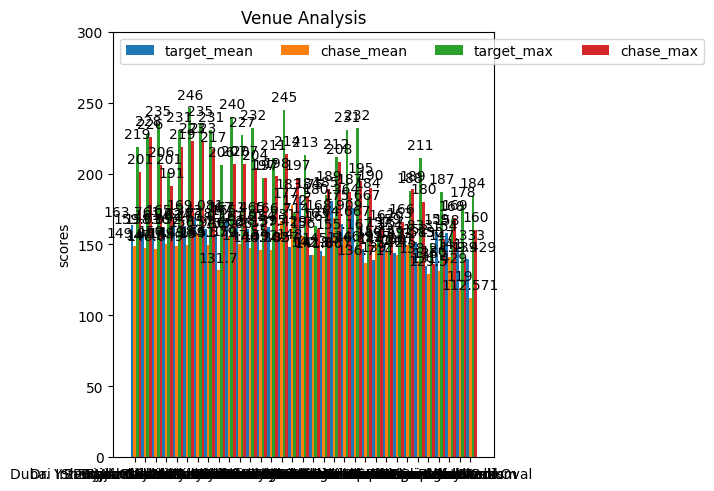

In [88]:
scores ={'target_mean':[],'chase_mean':[],'target_max':[],'chase_max':[]}
for i in normal_match_data.Venue.unique() : 
    #print('Analysis on "{} Stadium"'.format(i))
    target = normal_match_data[(normal_match_data.Venue == i) & (normal_match_data.innings == 1)].groupby('ID')['total_runs'].max()
    chase = normal_match_data[(normal_match_data.Venue == i) & (normal_match_data.innings == 2)].groupby('ID')['total_runs'].max()
    x  = target.mean()
    y = chase.mean()
    xmax = target.max()
    ymax = chase.max()
    #print(x, 'times team gave good target and win the match.')
    #print(y, 'times team easily chase the score and win the match.') 
    scores['target_mean'].append(x)
    scores['chase_mean'].append(y)
    scores['target_max'].append(xmax)
    scores['chase_max'].append(ymax)

venue = normal_match_data.Venue.unique()
x = np.arange(len(venue))
width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('scores')
ax.set_title('Venue Analysis')
ax.set_xticks(x + width, venue)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 300)

plt.show()
#variation of mean score is less, hence considering all stadiums

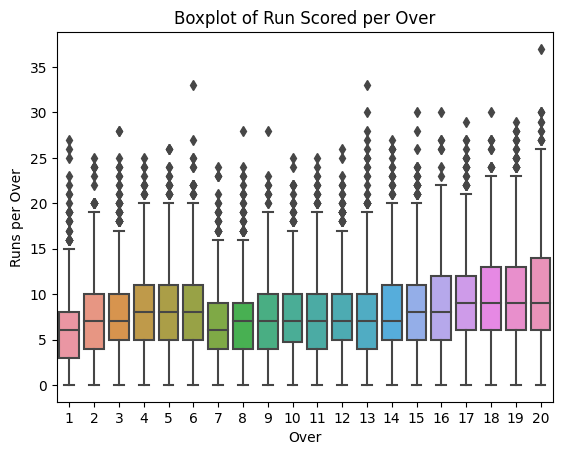

In [89]:
#grouping with conditions
import seaborn as sns
xd=normal_match_data.groupby(['ID', 'overs','innings'], as_index=False)['total_run'].sum()

#changing the range of overs from 0-19 to 1-20
xd['overs']=xd['overs']+1

#boxplot for distribution
sns.boxplot(y=xd['total_run'], x=xd['overs'])
plt.title('Boxplot of Run Scored per Over')
plt.ylabel('Runs per Over')
plt.xlabel('Over');
# variation of runs per over is not much has can consider all overs

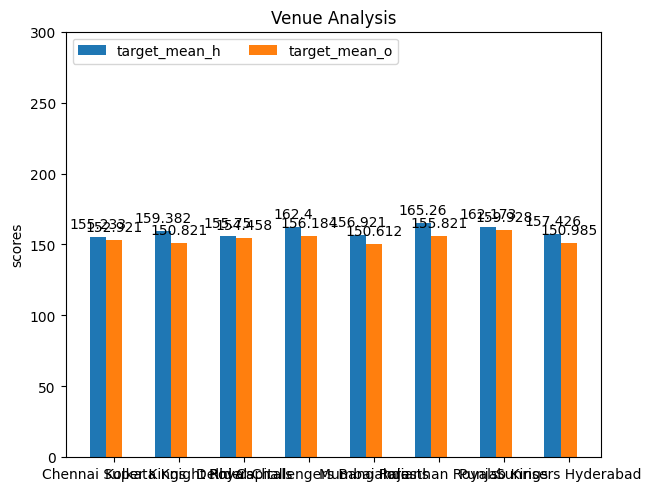

In [90]:

homeground = {
    'Rajasthan Royals': ['Sawai Mansingh Stadium'],
    #'Gujarat Titans': ['Narendra Modi Stadium','Saurashtra Cricket Association Stadium'],
    'Royal Challengers Bangalore': ['M.Chinnaswamy Stadium'],
    #'Lucknow Super Giants':['Green Park'],
    'Sunrisers Hyderabad':['Rajiv Gandhi International Stadium','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'],
    'Punjab Kings':['Punjab Cricket Association IS Bindra Stadium'],
    'Delhi Capitals':['Arun Jaitley Stadium'],
    'Mumbai Indians':['Wankhede Stadium','Brabourne Stadium','Dr DY Patil Sports Academy'],
    'Chennai Super Kings':['MA Chidambaram Stadium'],
    'Kolkata Knight Riders':['Eden Gardens']
}
scores ={'target_mean_h':[],'target_mean_o':[]}
for i in homeground:
    mean_score_h = normal_match_data[(normal_match_data.Venue.isin(homeground[i])) & (normal_match_data.BattingTeam == i)].groupby('ID')['total_runs'].max()
    mean_score_o = normal_match_data[(~normal_match_data.Venue.isin(homeground[i])) & (normal_match_data.BattingTeam == i)].groupby('ID')['total_runs'].max()
    scores['target_mean_h'].append(mean_score_h.mean())
    scores['target_mean_o'].append(mean_score_o.mean())
teams = normal_match_data.BattingTeam.unique()
x = np.arange(len(teams))
width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('scores')
ax.set_title('Venue Analysis')
ax.set_xticks(x + width, teams)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 300)

plt.show()
#mean of total score scored by temas at home location and different location is almost same, hence no point in adding homeground variable

In [91]:
normal_match_data['overs'] = normal_match_data['overs']+normal_match_data['ballnumber']*0.1

/tmp/ipykernel_7067/141919077.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
normal_match_data.drop(columns=['ballnumber','total_run'],inplace=True)

/tmp/ipykernel_7067/1722645008.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
normal_match_data.describe(include = 'all')

,ID,innings,overs,batter,bowler,non-striker,BattingTeam,Team2,Venue,total_wickets,total_runs,total_extra_runs,bt1_run,bt2_run
count,1.873490e+05,187349.000000,187349.000000,187349,187349,187349,187349,187349,187349,187349.000000,187349.000000,187349.000000,187349.000000,187349.000000
unique,NaN,NaN,NaN,539,436,537,8,8,33,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,V Kohli,R Ashwin,S Dhawan,Mumbai Indians,Mumbai Indians,Wankhede Stadium,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4705,3273,4880,24860,25634,17823,NaN,NaN,NaN,NaN,NaN
mean,7.920696e+05,1.480926,9.548643,NaN,NaN,NaN,NaN,NaN,NaN,2.414515,74.432503,4.034396,10.639608,23.602491
std,3.280153e+05,0.499637,5.679038,NaN,NaN,NaN,NaN,NaN,NaN,2.075949,48.054720,3.680088,12.589196,19.969862
min,3.359820e+05,1.000000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012290e+05,1.000000,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,34.000000,1.000000,2.000000,8.000000
50%,7.340110e+05,1.000000,9.400000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,70.000000,3.000000,6.000000,19.000000
75%,1.136605e+06,2.000000,14.400000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,110.000000,6.000000,15.000000,35.000000


In [94]:
normal_match_data['score'] =  normal_match_data.groupby(['ID','innings'])['total_runs'].transform('max')

/tmp/ipykernel_7067/4114046404.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
from scipy.stats import f_oneway
batting_run_cor = normal_match_data[['batter','bt1_run']].groupby('batter')['bt1_run'].apply(list)
AnovaResults = f_oneway(*batting_run_cor)
print('P-Value for Anova is: ', AnovaResults[1])
batting_run_cor = normal_match_data[['batter','bt2_run']].groupby('batter')['bt2_run'].apply(list)
AnovaResults = f_oneway(*batting_run_cor)
print('P-Value for Anova is: ', AnovaResults[1])
batting_run_cor = normal_match_data[['non-striker','bt1_run']].groupby('non-striker')['bt1_run'].apply(list)
AnovaResults = f_oneway(*batting_run_cor)
print('P-Value for Anova is: ', AnovaResults[1])
batting_run_cor = normal_match_data[['non-striker','bt2_run']].groupby('non-striker')['bt2_run'].apply(list)
AnovaResults = f_oneway(*batting_run_cor)
print('P-Value for Anova is: ', AnovaResults[1])
batting_run_cor = normal_match_data[['bowler','total_wickets']].groupby('bowler')['total_wickets'].apply(list)
AnovaResults = f_oneway(*batting_run_cor)
print('P-Value for Anova is: ', AnovaResults[1])
#High correlation between batter, non-striker, bowler, bt1_run, bt2_run, total_wickets 
# hence removing batter, bowler and non striker 
# as bt1_run and bt2_run can provide required insights

P-Value for Anova is:  0.0
P-Value for Anova is:  0.0
P-Value for Anova is:  0.0
P-Value for Anova is:  0.0
P-Value for Anova is:  0.0


In [96]:
batting_run_cor

bowler
A Ashish Reddy    [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, ...
A Chandila        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
A Choudhary       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...
A Dananjaya       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
A Flintoff        [2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, ...
                                        ...                        
YA Abdulla        [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...
YK Pathan         [2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, ...
YS Chahal         [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...
Yuvraj Singh      [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...
Z Khan            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, ...
Name: total_wickets, Length: 436, dtype: object

In [97]:
from scipy.stats import f_oneway
#batting_run_cor = normal_match_data.groupby(['ID','BattingTeam'])['score'].max().groupby('BattingTeam')['score'].apply(list)
bat_team = {}
dict1=normal_match_data.groupby(['ID','BattingTeam'])['score'].max().to_dict()
for i in dict1:
    if i[1] not in bat_team:
        bat_team[i[1]] = [dict1[i]]
    else:
        bat_team[i[1]].append(dict1[i])
bat_team = pd.Series(bat_team)
AnovaResults = f_oneway(*bat_team)
print('P-Value for Anova is: ', AnovaResults[1])
bat_team = {}
dict1=normal_match_data.groupby(['ID','Team2'])['score'].max().to_dict()
for i in dict1:
    if i[1] not in bat_team:
        bat_team[i[1]] = [dict1[i]]
    else:
        bat_team[i[1]].append(dict1[i])
bat_team = pd.Series(bat_team)
AnovaResults = f_oneway(*bat_team)
print('P-Value for Anova is: ', AnovaResults[1])
bat_team = {}
dict1=normal_match_data.groupby(['ID','innings','Venue'])['score'].max().to_dict()
for i in dict1:
    if i[2] not in bat_team:
        bat_team[i[2]] = [dict1[i]]
    else:
        bat_team[i[2]].append(dict1[i])
bat_team = pd.Series(bat_team)
AnovaResults = f_oneway(*bat_team)
print('P-Value for Anova is: ', AnovaResults[1])
#High correlation between batting_team, Team2 and score column hence keeping those columns
#low correlation score for venue and score column and hence removing it

P-Value for Anova is:  0.067630231711685
P-Value for Anova is:  0.9140977323621015
P-Value for Anova is:  0.00034066357976639245


In [98]:
#removing total_runs as well as it is highly correlated with overs and it is sum of bt1_ru,bt2_run and total_extra_runs
normal_match_data.drop(columns=['ID','innings','batter','bowler','non-striker','Venue','total_runs'],inplace=True)

/tmp/ipykernel_7067/2532154204.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
data_above_5_overs = normal_match_data[normal_match_data.overs>5]

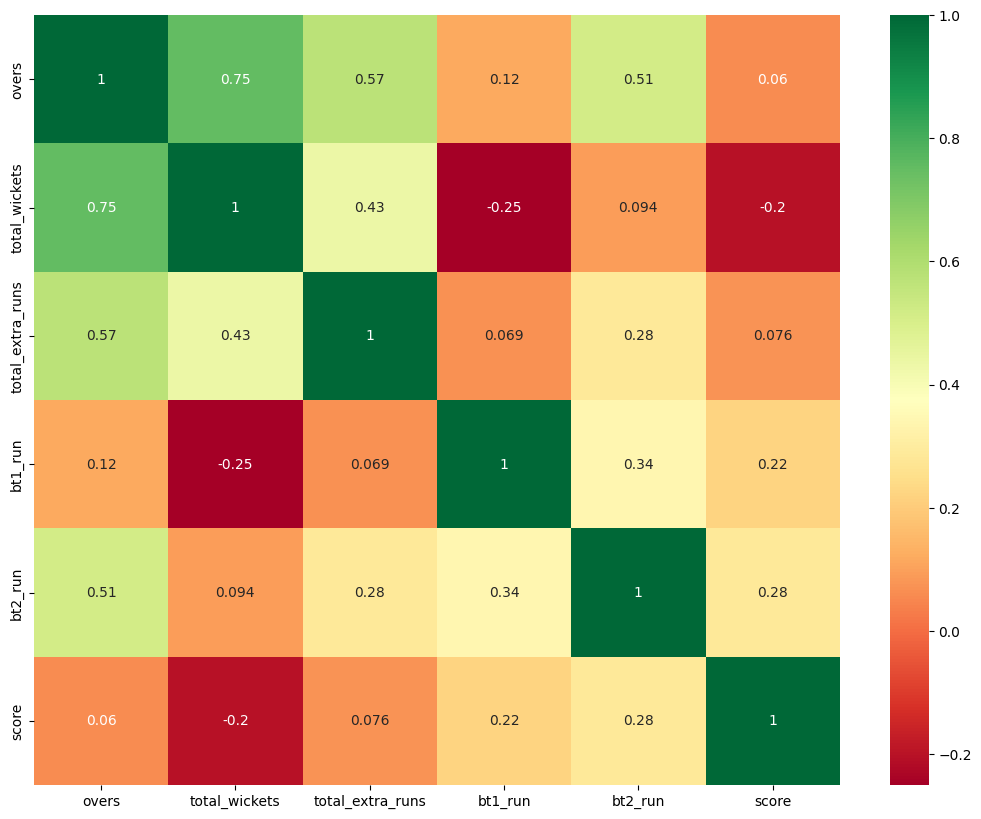

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix=normal_match_data[['overs','total_wickets',
       'total_extra_runs', 'bt1_run', 'bt2_run', 'score']].corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(13,10))
g = sns.heatmap(data=normal_match_data[top_corr_features].corr(), annot=True, cmap='RdYlGn')


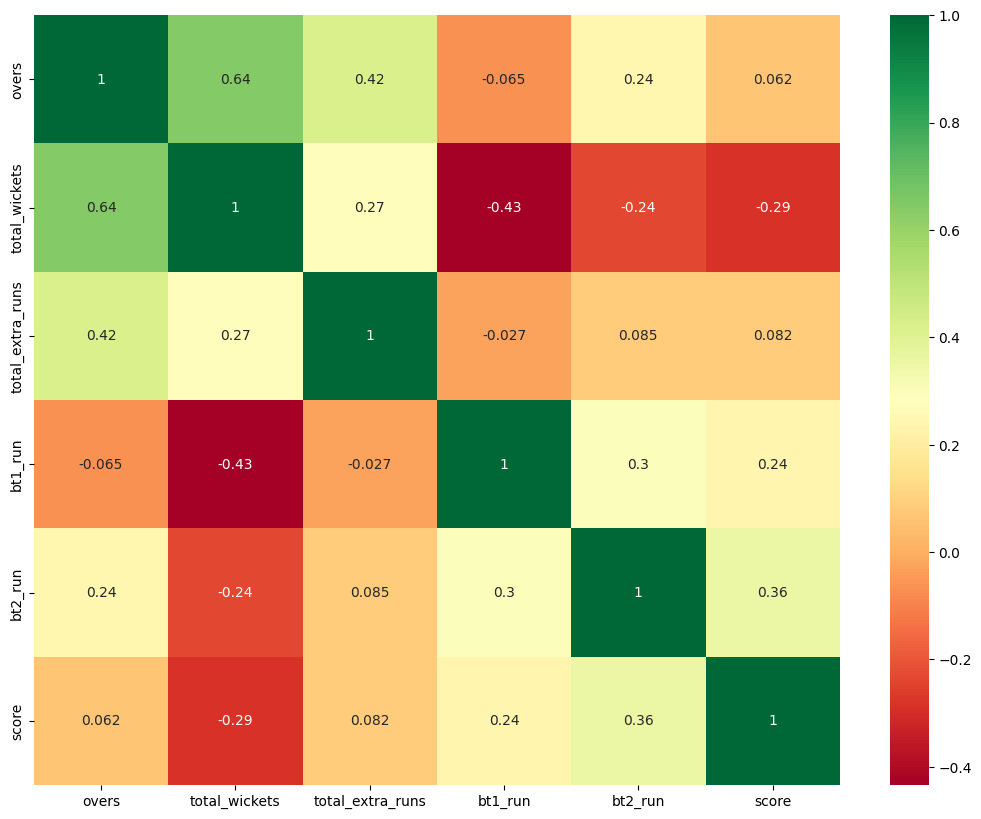

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix=data_above_5_overs[['overs','total_wickets',
       'total_extra_runs', 'bt1_run', 'bt2_run', 'score']].corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(13,10))
g = sns.heatmap(data=data_above_5_overs[top_corr_features].corr(), annot=True, cmap='RdYlGn')
#data above 5 overs provide a slight increase in correlation wit dependent variable but keeping it to 
# be able to predict first 5 overs as well

In [103]:
normal_match_data.isna().any()

overs               False
BattingTeam         False
Team2               False
total_wickets       False
total_extra_runs    False
bt1_run             False
bt2_run             False
score               False
dtype: bool